问题：
- 如何大致估算dataset大小来确定数据是否正确？

  一般通过df.shape来看，比如数据如果是A股过去30年每天的数据，那样本量应该是3000（粗略估计A股数量）*30（年）   *250（每年交易日的数量）这个数量级的。如果数量级层面差异很大那可能就是数据有问题。

- 是A股1990来的所有数据么？

  是的是A股开始以来的所有价格数据

- 常用单位的确定

  常用单位指的是什么？如果是说数据里面每个变量的单位的话，数据库一般都会描述。
  单位重要的，这也是为什么我一开始要检查货币单位是不是只有人民币。在处理数据前搞清楚单位很重要，比如有些数据   库是以千元存储的，有些是以百万元为单位。
  
- 数据裁剪会影响数据完整性么

  数据裁剪毕竟是严格按照我们要求的方式在选取的，在逻辑和代码都正确的情况下不会造成意料外的数据丢失。

- chain indexing

  一般来说推荐用.loc和.iloc选数据，比chain indexing可读性好一点
 
- 不用处理outliers和normalization么

  要处理异常值的，我这份代码漏了这部分。
  winsorize是必须的，但我这里漏了normalize不是必须的，一般只有输入给机器学习模型的时候才需要做，但其实也并   非必要

- 什么时候“”什么时候‘’

  双引号和单引号无所谓，都表示字符串。只有极个别情况下需要区分，比如你的字符串本身的内容包含了双引号，那就只   能用单引号来表示字符串。反之亦然。

- [[]]的目的 dataframe 和array 的转化？为什么有些就要[[]]

  哦哦对，这里是为了保证X是一个二维矩阵，而Y是一个一维向量，所以用了不同的写法
  嗯是的，X输入一维向量我记得会报错
  
- 上次的cum的问题

- SMB和HML的代码实现
  www.jianshu.com/p/ec15223d1607
  
- 市场回报率是用今天的回报率乘以昨天的市值么

- S_VAL_MV 和 S_DQ_MV的区别

- SMB和HML那里不用dropna么
- .copy()
- df[df[p]]
- tf left_only怎么出来的
- 中国无风险利率为什么是1年而非三个月 /12转化成月么？

<p style="font-size:200%;font-weight:bold">资产定价</p>

- 作者:
- 日期:


In [146]:
# <p style="font-size:200%;font-weight:bold">资产定价</p>
# 注意：1.在Markdown里面写
#       2.除了<p后面有个空格，其他没有空格
#       3.weight而非weighted并且用:,=在前面

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
#注意：1.pandas别打成panda
#      2.InteractiveShell大小写

InteractiveShell.ast_node_interactivity = "all"
pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 500)
# display.max_rows and display.max_columns sets the maximum number of rows
# and columns displayed when a frame is pretty-printed. Truncated lines
# are replaced by an ellipsis.
#设置最多显示的列，多出的用省略号替代

%matplotlib inline
#内嵌画图，省略掉plt.show()这一步

RD = "C:\\Users\\lyc\\Desktop\\SSCI\\02_rdata\\"
WD = "C:\\Users\\lyc\\Desktop\\SSCI\\03_wdata\\"
#设置读写路径变量
#注意：1.不能用\而要改成\\
#      2.最后的\\别忘了

In [148]:
import os
os.getcwd()
#知道当前的路径

'C:\\Users\\lyc\\Desktop\\SSCI\\01_code'

# 读入数据

In [149]:
#普通标题用#并且注意空格

## 价格

In [150]:
prc = pd.read_parquet(f'{RD}ASHAREEODPRICES.pq')
#读取由python生成的处理更快速的parquet文件
#注意：1.f‘{RD}
#      2.单引号并且带后缀
#      3.注意引号对应
#      4.后缀千万别写错 (pq写成了pd)
#      5.如果不知道可以在网页里试错
prc.shape
#给出dataframe的行列数
prc.sample(3)
#随机给出三个样本
#注意：1.ADJCLOSE考虑了拆股等事件，是重点研究对象

(12711196, 24)

,OBJECT_ID,S_INFO_WINDCODE,TRADE_DT,CRNCY_CODE,S_DQ_PRECLOSE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_CHANGE,S_DQ_PCTCHANGE,S_DQ_VOLUME,S_DQ_AMOUNT,S_DQ_ADJPRECLOSE,S_DQ_ADJOPEN,S_DQ_ADJHIGH,S_DQ_ADJLOW,S_DQ_ADJCLOSE,S_DQ_ADJFACTOR,S_DQ_AVGPRICE,S_DQ_TRADESTATUS,S_DQ_TRADESTATUSCODE,OPDATE,OPMODE
6173383,{33CDC6BB-53DB-11EB-8ABD-FEDE574F2877},003031.SZ,20210111,CNY,32.20,35.42,35.42,35.42,35.42,3.22,10.0000,6177.76,21881.6250,32.20,35.42,35.42,35.42,35.42,1.000000,35.4200,交易,-1.0,2021-01-11 15:17:35,1
6193753,{5F20ADCB-595B-11EB-8ABD-FEDE574F2877},002285.SZ,20210118,CNY,4.77,4.77,4.87,4.70,4.74,-0.03,-0.6289,190583.74,90913.2750,69.56,69.56,71.02,68.54,69.13,14.583809,4.7703,交易,-1.0,2021-01-18 15:12:53,1
2342448,{50152478-D373-4BB7-8BB9-25F7F5763C39},000540.SZ,20160830,CNY,6.99,7.01,7.03,6.88,6.90,-0.09,-1.2876,303024.63,209796.7948,359.08,360.11,361.14,353.43,354.46,51.371103,6.9234,交易,-1.0,2016-08-30 15:11:24,0


In [151]:
prc['TRADE_DT'] = pd.to_datetime(prc['TRADE_DT'])
#将各种类型的时间戳转换成pandas的时间戳
#注意：1.以后统一用‘’（用了“”）
#     2.datetime(而非datatime)
#     3.文件名应该完全一致（Trade_DT）
prc['TRADE_DT'].describe(datetime_is_numeric=True)
#检验一下转化是不是成功并且确定period
#设置成时间戳

count                         12711196
mean     2012-10-09 05:59:53.134868480
min                1990-12-19 00:00:00
25%                2007-12-03 00:00:00
50%                2014-05-26 00:00:00
75%                2018-09-06 00:00:00
max                2021-12-16 00:00:00
Name: TRADE_DT, dtype: object

In [152]:
prc['CRNCY_CODE'].value_counts()
#计数确定Currency
#注意：1.每一列的标题记得带‘’（CRNCY_CODE）

CNY    12711196
Name: CRNCY_CODE, dtype: int64

In [153]:
prc = prc.loc[
     (prc['TRADE_DT'] >= "2018-01-01")
    & (prc['S_INFO_WINDCODE'].str.contains('SZ|SH'))
    #dataframe.str.contains('')如果含有特定字符串就返回True
    #()&():且，()|()：或
    ,
    [
     "S_INFO_WINDCODE",
     "TRADE_DT",
     "S_DQ_ADJCLOSE",
    ]
]
prc.shape
prc.head()
#loc：索引和切割1
#注意：1.【】外用双引号“”（‘’）

(3702810, 3)

,S_INFO_WINDCODE,TRADE_DT,S_DQ_ADJCLOSE
3401828,000001.SZ,2018-01-02,1456.43
3401829,000002.SZ,2018-01-02,4470.49
3401830,000004.SZ,2018-01-02,90.79
3401831,000005.SZ,2018-01-02,40.04
3401832,000006.SZ,2018-01-02,327.21


In [154]:
prc['TRADE_DT'].dt.year
#提取时间戳的年份
prc['TRADE_DT'].dt.month
#提取时间戳的月份

3401828    2018
3401829    2018
3401830    2018
3401831    2018
3401832    2018
           ... 
351701     2021
351702     2021
351703     2021
351704     2021
351705     2021
Name: TRADE_DT, Length: 3702810, dtype: int64

3401828     1
3401829     1
3401830     1
3401831     1
3401832     1
           ..
351701     12
351702     12
351703     12
351704     12
351705     12
Name: TRADE_DT, Length: 3702810, dtype: int64

In [155]:
prc['ym'] = prc['TRADE_DT'].dt.year * 100 + prc['TRADE_DT'].dt.month
prc.sample()
#多处一行用来单独显示年份和月份的列

,S_INFO_WINDCODE,TRADE_DT,S_DQ_ADJCLOSE,ym
6598554,000777.SZ,2021-06-10,79.18,202106


In [156]:
prc.sort_values(['S_INFO_WINDCODE','TRADE_DT'], ascending = True, inplace = True )
#按照升序（由上往下增加的正常金融处理顺序）给值排序
prc.drop_duplicates(subset=['S_INFO_WINDCODE','ym'], keep='last', inplace = True)
#返回删除重复行的dataframe，subset只考虑特定列来删除重复（且的关系），keep=‘last’只保留最后一个样本
#删除重复的月数只保留最后一个月
prc.shape
prc.sample(3)

(185692, 4)

,S_INFO_WINDCODE,TRADE_DT,S_DQ_ADJCLOSE,ym
7021281,601011.SH,2021-10-29,12.63,202110
5555421,002561.SZ,2020-05-29,10.38,202005
5556975,600400.SH,2020-05-29,39.69,202005


In [157]:
prc

,S_INFO_WINDCODE,TRADE_DT,S_DQ_ADJCLOSE,ym
3476144,000001.SZ,2018-01-31,1493.64,201801
3529458,000001.SZ,2018-02-28,1281.02,201802
3607903,000001.SZ,2018-03-30,1158.77,201803
3672266,000001.SZ,2018-04-27,1153.45,201804
3751140,000001.SZ,2018-05-31,1082.22,201805
...,...,...,...,...
6858016,688981.SH,2021-08-31,55.69,202108
6949088,688981.SH,2021-09-30,55.20,202109
7022467,688981.SH,2021-10-29,55.04,202110
7124123,688981.SH,2021-11-30,54.26,202111


In [158]:
mv = pd.read_parquet(f'{RD}ASHAREEODDERIVATIVEINDICATOR.pq', columns = ['S_INFO_WINDCODE', 'TRADE_DT', 'S_DQ_MV', 'S_VAL_PB_NEW'])
#读取某个文件的某几列
#MV市值，PB市净率，账面市值比
mv['TRADE_DT'] = pd.to_datetime(mv['TRADE_DT'])
mv.shape
mv.sample(3)

(19122875, 4)

,S_INFO_WINDCODE,TRADE_DT,S_DQ_MV,S_VAL_PB_NEW
663349,600880.SH,2001-12-04,84257.4294,11.7597
6468674,002204.SZ,2018-04-22,813106.7835,1.2326
3388720,600833.SH,2015-08-16,481420.3368,6.9262


In [159]:
mv

,S_INFO_WINDCODE,TRADE_DT,S_DQ_MV,S_VAL_PB_NEW
0,000001.SZ,2011-12-01,4.931310e+06,1.1671
1,000002.SZ,2011-12-01,7.137689e+06,1.7327
2,000004.SZ,2011-12-01,9.226490e+04,12.6414
3,000005.SZ,2011-12-01,3.527048e+05,5.0290
4,000006.SZ,2011-12-01,4.684393e+05,1.7810
...,...,...,...,...
704372,002452.SZ,2021-12-16,4.603038e+05,3.3426
704373,688088.SH,2021-12-16,1.222079e+06,7.3316
704374,002853.SZ,2021-12-16,1.907696e+05,1.5173
704375,002044.SZ,2021-12-16,2.859642e+06,3.7708


In [160]:
df = prc.merge(mv, on=['S_INFO_WINDCODE', 'TRADE_DT'], how= 'left', validate='1:1', indicator=True)
#将两个dataframes合并
#参数：
#1. on:将两个dataframes的label匹配然后合并，默认就是行与行合并
#2. how: ‘left’：韦恩图，左边dataframe保留，右边只保留不重复部分
#3. validate: ‘1：1’检查是不是左右数据集唯一
#4. indicator: 给出是left_only还是right_only
df['_merge'].value_counts()
#分类计数
df

both          185691
left_only          1
right_only         0
Name: _merge, dtype: int64

,S_INFO_WINDCODE,TRADE_DT,S_DQ_ADJCLOSE,ym,S_DQ_MV,S_VAL_PB_NEW,_merge
0,000001.SZ,2018-01-31,1493.64,201801,2.376978e+07,1.2174,both
1,000001.SZ,2018-02-28,1281.02,201802,2.038618e+07,1.0441,both
2,000001.SZ,2018-03-30,1158.77,201803,1.844060e+07,0.9261,both
3,000001.SZ,2018-04-27,1153.45,201804,1.835601e+07,0.9158,both
4,000001.SZ,2018-05-31,1082.22,201805,1.747931e+07,0.8592,both
...,...,...,...,...,...,...,...
185687,688981.SH,2021-08-31,55.69,202108,1.041981e+07,4.2440,both
185688,688981.SH,2021-09-30,55.20,202109,1.032813e+07,4.2070,both
185689,688981.SH,2021-10-29,55.04,202110,1.029819e+07,4.1948,both
185690,688981.SH,2021-11-30,54.26,202111,1.015225e+07,4.0193,both


In [161]:
#df = df.loc[df['_merge']=='both']
#注意：
#1.字符串用双等号
#2.字符串别忘记打引号
#df.drop(columns=['_merge','TRADE_DT'], inplace=True)
#注意：
#1.df.drop
#df.sample(3)
df = df.loc[df['_merge'] == 'both']
df.drop(columns=['_merge', 'TRADE_DT'], inplace=True)
df.sample(3)

,S_INFO_WINDCODE,S_DQ_ADJCLOSE,ym,S_DQ_MV,S_VAL_PB_NEW
80290,300264.SZ,25.59,202105,2.061852e+05,10.2867
33332,002236.SZ,874.07,202009,3.806721e+06,3.6228
76638,300188.SZ,244.21,201808,9.168930e+05,6.3569


In [162]:
df.columns = ['stkcd', 'prc', 'ym', 'mv', 'pb']
df

,stkcd,prc,ym,mv,pb
0,000001.SZ,1493.64,201801,2.376978e+07,1.2174
1,000001.SZ,1281.02,201802,2.038618e+07,1.0441
2,000001.SZ,1158.77,201803,1.844060e+07,0.9261
3,000001.SZ,1153.45,201804,1.835601e+07,0.9158
4,000001.SZ,1082.22,201805,1.747931e+07,0.8592
...,...,...,...,...,...
185687,688981.SH,55.69,202108,1.041981e+07,4.2440
185688,688981.SH,55.20,202109,1.032813e+07,4.2070
185689,688981.SH,55.04,202110,1.029819e+07,4.1948
185690,688981.SH,54.26,202111,1.015225e+07,4.0193


In [163]:
df.sort_values(['stkcd', 'ym'], ascending=True, inplace=True)
df['ret'] = df.groupby(['stkcd'])['prc'].pct_change()
#组内操作，可以代替循环语句前一个（）表示要分的组（用于在不同组内操作）后一个【】表示要操作的列
#pct_change求simple percentage change
#注意：1.要么用点，要么用【】
df['ret_l1'] = df.groupby(['stkcd'])['ret'].shift()
#默认往下shift 1 格
df['ret_l12_l2'] = df.groupby(['stkcd'])['prc'].shift(12) / df.groupby(['stkcd'])['prc'].shift(2) - 1
#注意-1
df['mv_l1'] = df.groupby(['stkcd'])['mv'].shift()
df['pb_l1'] = df.groupby(['stkcd'])['pb'].shift()
#df.drop(columns=['prc'], inplace = True)
df

,stkcd,prc,ym,mv,pb,ret,ret_l1,ret_l12_l2,mv_l1,pb_l1
0,000001.SZ,1493.64,201801,2.376978e+07,1.2174,NaN,NaN,NaN,NaN,NaN
1,000001.SZ,1281.02,201802,2.038618e+07,1.0441,-0.142350,NaN,NaN,2.376978e+07,1.2174
2,000001.SZ,1158.77,201803,1.844060e+07,0.9261,-0.095432,-0.142350,NaN,2.038618e+07,1.0441
3,000001.SZ,1153.45,201804,1.835601e+07,0.9158,-0.004591,-0.095432,NaN,1.844060e+07,0.9261
4,000001.SZ,1082.22,201805,1.747931e+07,0.8592,-0.061754,-0.004591,NaN,1.835601e+07,0.9158
...,...,...,...,...,...,...,...,...,...,...
185687,688981.SH,55.69,202108,1.041981e+07,4.2440,-0.139125,0.046425,0.078615,1.210375e+07,5.0720
185688,688981.SH,55.20,202109,1.032813e+07,4.2070,-0.008799,-0.139125,-0.232493,1.041981e+07,4.2440
185689,688981.SH,55.04,202110,1.029819e+07,4.1948,-0.002899,-0.008799,0.117615,1.032813e+07,4.2070
185690,688981.SH,54.26,202111,1.015225e+07,4.0193,-0.014172,-0.002899,0.073370,1.029819e+07,4.1948


In [164]:
df.to_parquet(f'{WD}0001_teaching/return.pq')

In [165]:
df = pd.read_parquet(f'{WD}0001_teaching/return.pq')
#注意：1。是pd.read
df.shape
#注意：1.没有（）
df

(185691, 10)

,stkcd,prc,ym,mv,pb,ret,ret_l1,ret_l12_l2,mv_l1,pb_l1
0,000001.SZ,1493.64,201801,2.376978e+07,1.2174,NaN,NaN,NaN,NaN,NaN
1,000001.SZ,1281.02,201802,2.038618e+07,1.0441,-0.142350,NaN,NaN,2.376978e+07,1.2174
2,000001.SZ,1158.77,201803,1.844060e+07,0.9261,-0.095432,-0.142350,NaN,2.038618e+07,1.0441
3,000001.SZ,1153.45,201804,1.835601e+07,0.9158,-0.004591,-0.095432,NaN,1.844060e+07,0.9261
4,000001.SZ,1082.22,201805,1.747931e+07,0.8592,-0.061754,-0.004591,NaN,1.835601e+07,0.9158
...,...,...,...,...,...,...,...,...,...,...
185687,688981.SH,55.69,202108,1.041981e+07,4.2440,-0.139125,0.046425,0.078615,1.210375e+07,5.0720
185688,688981.SH,55.20,202109,1.032813e+07,4.2070,-0.008799,-0.139125,-0.232493,1.041981e+07,4.2440
185689,688981.SH,55.04,202110,1.029819e+07,4.1948,-0.002899,-0.008799,0.117615,1.032813e+07,4.2070
185690,688981.SH,54.26,202111,1.015225e+07,4.0193,-0.014172,-0.002899,0.073370,1.029819e+07,4.1948


In [166]:
df['retw'] = df['ret']
df.loc[df['ret'] <= df['ret'].quantile(0.01), 'retw'] = df['ret'].quantile(0.01)
df.loc[df['ret'] >= df['ret'].quantile(0.99), 'retw'] = df['ret'].quantile(0.99)
#Winsorize

,ret,retw
count,181061.000000,181061.000000
mean,0.009081,0.007343
std,0.141656,0.123758
min,-0.863659,-0.258092
25%,-0.069743,-0.069743
50%,-0.007089,-0.007089
75%,0.063953,0.063953
max,4.563492,0.461865


array([[<AxesSubplot:title={'center':'ret'}>,
        <AxesSubplot:title={'center':'retw'}>]], dtype=object)

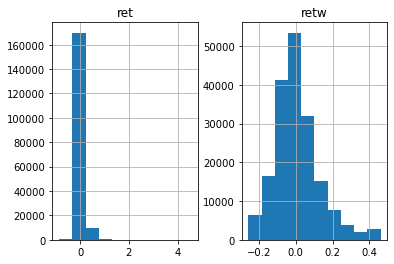

In [167]:
df[['ret', 'retw']].describe()
df[['ret', 'retw']].hist()
#看Winsorize后的各项对比[[]]将dataframe转化成numpy

<AxesSubplot:>

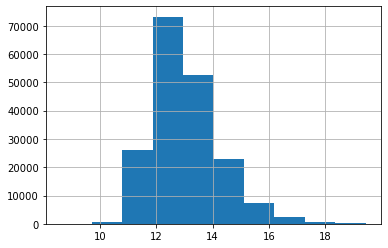

In [168]:
df['mv'].apply(lambda x: np.log(x)).hist() 
#接近于log-normal distribution

## 市场回报率

In [169]:
mret = df.copy()
#将dateframe复制一遍
mret['retw'] *= mret['mv_l1']
#市场回报率等于市值weighted回报率
# x*= 1 等同于 x=x*1
mret['cnt'] = 1
mret = mret.groupby(['ym'], as_index=False)[['retw','mv_l1', 'cnt']].sum()
# 在求和sum时如果as_index=True则groupby的对象会成为新的index，否则就用1，2，3...作为index
# 用ym分组，然后分别对ret，mv求和
# groupby的操作项如果有多列，就用[[]]

mret['mret'] = mret['retw'] / mret['mv_l1']
mret.drop(columns=['mv_l1','retw'], inplace=True)
#顺序必须是从左到右
mret.head(3)
mret.tail(3)

,ym,cnt,mret
0,201801,3477,NaN
1,201802,3489,-0.05428
2,201803,3499,-0.01424


,ym,cnt,mret
45,202110,4523,-0.001535
46,202111,4555,0.019872
47,202112,4577,0.025738


## SMB & HML

In [170]:
df['size_rank'] = df.groupby(['ym'])['mv_l1'].rank(pct=True)
#计算出百分位顺序
df['pb_rank'] = df.groupby(['ym'])['pb_l1'].rank(pct=True)
#ret只能用lag上一个月的pb数据
df.head()
df.tail()

,stkcd,prc,ym,mv,pb,ret,ret_l1,ret_l12_l2,mv_l1,pb_l1,retw,size_rank,pb_rank
0,000001.SZ,1493.64,201801,2.376978e+07,1.2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000001.SZ,1281.02,201802,2.038618e+07,1.0441,-0.142350,NaN,NaN,2.376978e+07,1.2174,-0.142350,0.993385,0.035488
2,000001.SZ,1158.77,201803,1.844060e+07,0.9261,-0.095432,-0.142350,NaN,2.038618e+07,1.0441,-0.095432,0.992548,0.020678
3,000001.SZ,1153.45,201804,1.835601e+07,0.9158,-0.004591,-0.095432,NaN,1.844060e+07,0.9261,-0.004591,0.992569,0.011451
4,000001.SZ,1082.22,201805,1.747931e+07,0.8592,-0.061754,-0.004591,NaN,1.835601e+07,0.9158,-0.061754,0.992018,0.013154


,stkcd,prc,ym,mv,pb,ret,ret_l1,ret_l12_l2,mv_l1,pb_l1,retw,size_rank,pb_rank
185687,688981.SH,55.69,202108,1.041981e+07,4.2440,-0.139125,0.046425,0.078615,1.210375e+07,5.0720,-0.139125,0.980512,0.774245
185688,688981.SH,55.20,202109,1.032813e+07,4.2070,-0.008799,-0.139125,-0.232493,1.041981e+07,4.2440,-0.008799,0.974618,0.704200
185689,688981.SH,55.04,202110,1.029819e+07,4.1948,-0.002899,-0.008799,0.117615,1.032813e+07,4.2070,-0.002899,0.975952,0.723222
185690,688981.SH,54.26,202111,1.015225e+07,4.0193,-0.014172,-0.002899,0.073370,1.029819e+07,4.1948,-0.014172,0.975674,0.733959
185691,688981.SH,53.44,202112,9.998828e+06,3.9586,-0.015112,-0.014172,0.049237,1.015225e+07,4.0193,-0.015112,0.974753,0.663558


In [171]:
df['sl'] = (df['size_rank'] < 0.5) & (df['pb_rank']<0.3)
df['sn'] = (df['size_rank'] < 0.5) & (df['pb_rank'].between(0.3, 0.7))
df['sh'] = (df['size_rank'] < 0.5) & (df['pb_rank']>0.7)
df['bl'] = (df['size_rank'] > 0.5) & (df['pb_rank']<0.3)
df['bn'] = (df['size_rank'] > 0.5) & (df['pb_rank'].between(0.3, 0.7))
df['bh'] = (df['size_rank'] > 0.5) & (df['pb_rank']>0.7)

df

,stkcd,prc,ym,mv,pb,ret,ret_l1,ret_l12_l2,mv_l1,pb_l1,retw,size_rank,pb_rank,sl,sn,sh,bl,bn,bh
0,000001.SZ,1493.64,201801,2.376978e+07,1.2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False
1,000001.SZ,1281.02,201802,2.038618e+07,1.0441,-0.142350,NaN,NaN,2.376978e+07,1.2174,-0.142350,0.993385,0.035488,False,False,False,True,False,False
2,000001.SZ,1158.77,201803,1.844060e+07,0.9261,-0.095432,-0.142350,NaN,2.038618e+07,1.0441,-0.095432,0.992548,0.020678,False,False,False,True,False,False
3,000001.SZ,1153.45,201804,1.835601e+07,0.9158,-0.004591,-0.095432,NaN,1.844060e+07,0.9261,-0.004591,0.992569,0.011451,False,False,False,True,False,False
4,000001.SZ,1082.22,201805,1.747931e+07,0.8592,-0.061754,-0.004591,NaN,1.835601e+07,0.9158,-0.061754,0.992018,0.013154,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185687,688981.SH,55.69,202108,1.041981e+07,4.2440,-0.139125,0.046425,0.078615,1.210375e+07,5.0720,-0.139125,0.980512,0.774245,False,False,False,False,False,True
185688,688981.SH,55.20,202109,1.032813e+07,4.2070,-0.008799,-0.139125,-0.232493,1.041981e+07,4.2440,-0.008799,0.974618,0.704200,False,False,False,False,False,True
185689,688981.SH,55.04,202110,1.029819e+07,4.1948,-0.002899,-0.008799,0.117615,1.032813e+07,4.2070,-0.002899,0.975952,0.723222,False,False,False,False,False,True
185690,688981.SH,54.26,202111,1.015225e+07,4.0193,-0.014172,-0.002899,0.073370,1.029819e+07,4.1948,-0.014172,0.975674,0.733959,False,False,False,False,False,True


In [172]:
rets = []
for p in ['sl', 'sn', 'sh', 'bl', 'bn', 'bh']:
    t = df[df[p]].copy()
    t['retw'] *= t['mv_l1']
    t= t.groupby(['ym'])[['retw', 'mv_l1']].sum()
    #先分类，然后返回ym为序的唯一和
    t['retw'] /= t['mv_l1']
    t.drop(columns = ['mv_l1'], inplace=True)
    t.columns = [p]
    #将列命名为sl
    rets.append(t)
ret = pd.concat(rets, axis=1)
ret.head()
ret.tail()

,sl,sn,sh,bl,bn,bh
ym,,,,,,
201802,-0.054748,-0.053591,-0.053247,-0.073155,-0.047822,-0.020426
201803,0.046115,0.066899,0.081976,-0.040564,-0.012172,0.007749
201804,-0.048477,-0.035306,-0.043881,-0.021370,-0.045697,-0.033642
201805,-0.006804,-0.010444,-0.016240,-0.015681,-0.001078,0.051209
201806,-0.110117,-0.118928,-0.095964,-0.068038,-0.084326,-0.060650


,sl,sn,sh,bl,bn,bh
ym,,,,,,
202108,0.076212,0.060747,0.028532,0.076385,0.068179,-0.018763
202109,0.008067,-0.020927,-0.057363,0.032617,-0.015481,-0.013739
202110,-0.043613,-0.029209,-0.002741,-0.032313,-0.020414,0.035446
202111,0.092928,0.141859,0.136116,-0.013613,0.029914,0.022324
202112,0.054409,0.022992,-0.007313,0.049245,0.027684,0.007189


In [173]:
ret['smb'] = (ret['sl'] + ret['sn'] + ret['sh'])/ 3 - (ret['bl'] + ret['bn'] + ret['bh'])/ 3
ret['hml'] = (ret['sh'] + ret['bh']) / 2 - (ret['sl'] + ret['bl']) / 2
ret.head()
ret.tail()

,sl,sn,sh,bl,bn,bh,smb,hml
ym,,,,,,,,
201802,-0.054748,-0.053591,-0.053247,-0.073155,-0.047822,-0.020426,-0.006727,0.027115
201803,0.046115,0.066899,0.081976,-0.040564,-0.012172,0.007749,0.079992,0.042087
201804,-0.048477,-0.035306,-0.043881,-0.021370,-0.045697,-0.033642,-0.008985,-0.003838
201805,-0.006804,-0.010444,-0.016240,-0.015681,-0.001078,0.051209,-0.022646,0.028727
201806,-0.110117,-0.118928,-0.095964,-0.068038,-0.084326,-0.060650,-0.037332,0.010771


,sl,sn,sh,bl,bn,bh,smb,hml
ym,,,,,,,,
202108,0.076212,0.060747,0.028532,0.076385,0.068179,-0.018763,0.013230,-0.071413
202109,0.008067,-0.020927,-0.057363,0.032617,-0.015481,-0.013739,-0.024540,-0.055893
202110,-0.043613,-0.029209,-0.002741,-0.032313,-0.020414,0.035446,-0.019427,0.054316
202111,0.092928,0.141859,0.136116,-0.013613,0.029914,0.022324,0.110759,0.039562
202112,0.054409,0.022992,-0.007313,0.049245,0.027684,0.007189,-0.004676,-0.051889


In [174]:
tf = ret.loc[:,['smb', 'hml']].reset_index()
#只保留这两个因子并重设index
tf.head()
tf.tail()

,ym,smb,hml
0,201802,-0.006727,0.027115
1,201803,0.079992,0.042087
2,201804,-0.008985,-0.003838
3,201805,-0.022646,0.028727
4,201806,-0.037332,0.010771


,ym,smb,hml
42,202108,0.013230,-0.071413
43,202109,-0.024540,-0.055893
44,202110,-0.019427,0.054316
45,202111,0.110759,0.039562
46,202112,-0.004676,-0.051889


## Momentum

In [175]:
df['ret_rank'] = df.groupby(['ym'])['ret_l12_l2'].rank(pct=True)
df

,stkcd,prc,ym,mv,pb,ret,ret_l1,ret_l12_l2,mv_l1,pb_l1,retw,size_rank,pb_rank,sl,sn,sh,bl,bn,bh,ret_rank
0,000001.SZ,1493.64,201801,2.376978e+07,1.2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,NaN
1,000001.SZ,1281.02,201802,2.038618e+07,1.0441,-0.142350,NaN,NaN,2.376978e+07,1.2174,-0.142350,0.993385,0.035488,False,False,False,True,False,False,NaN
2,000001.SZ,1158.77,201803,1.844060e+07,0.9261,-0.095432,-0.142350,NaN,2.038618e+07,1.0441,-0.095432,0.992548,0.020678,False,False,False,True,False,False,NaN
3,000001.SZ,1153.45,201804,1.835601e+07,0.9158,-0.004591,-0.095432,NaN,1.844060e+07,0.9261,-0.004591,0.992569,0.011451,False,False,False,True,False,False,NaN
4,000001.SZ,1082.22,201805,1.747931e+07,0.8592,-0.061754,-0.004591,NaN,1.835601e+07,0.9158,-0.061754,0.992018,0.013154,False,False,False,True,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185687,688981.SH,55.69,202108,1.041981e+07,4.2440,-0.139125,0.046425,0.078615,1.210375e+07,5.0720,-0.139125,0.980512,0.774245,False,False,False,False,False,True,0.438654
185688,688981.SH,55.20,202109,1.032813e+07,4.2070,-0.008799,-0.139125,-0.232493,1.041981e+07,4.2440,-0.008799,0.974618,0.704200,False,False,False,False,False,True,0.208261
185689,688981.SH,55.04,202110,1.029819e+07,4.1948,-0.002899,-0.008799,0.117615,1.032813e+07,4.2070,-0.002899,0.975952,0.723222,False,False,False,False,False,True,0.631956
185690,688981.SH,54.26,202111,1.015225e+07,4.0193,-0.014172,-0.002899,0.073370,1.029819e+07,4.1948,-0.014172,0.975674,0.733959,False,False,False,False,False,True,0.517844


In [176]:
df['sl'] = (df['size_rank'] <= 0.5) & (df['ret_rank'] < 0.3)
df['sh'] = (df['size_rank'] <= 0.5) & (df['ret_rank'] > 0.7)
df['bl'] = (df['size_rank'] > 0.5) & (df['ret_rank'] < 0.3)
df['bh'] = (df['size_rank'] > 0.5) & (df['ret_rank'] > 0.7)
df

,stkcd,prc,ym,mv,pb,ret,ret_l1,ret_l12_l2,mv_l1,pb_l1,retw,size_rank,pb_rank,sl,sn,sh,bl,bn,bh,ret_rank
0,000001.SZ,1493.64,201801,2.376978e+07,1.2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,NaN
1,000001.SZ,1281.02,201802,2.038618e+07,1.0441,-0.142350,NaN,NaN,2.376978e+07,1.2174,-0.142350,0.993385,0.035488,False,False,False,False,False,False,NaN
2,000001.SZ,1158.77,201803,1.844060e+07,0.9261,-0.095432,-0.142350,NaN,2.038618e+07,1.0441,-0.095432,0.992548,0.020678,False,False,False,False,False,False,NaN
3,000001.SZ,1153.45,201804,1.835601e+07,0.9158,-0.004591,-0.095432,NaN,1.844060e+07,0.9261,-0.004591,0.992569,0.011451,False,False,False,False,False,False,NaN
4,000001.SZ,1082.22,201805,1.747931e+07,0.8592,-0.061754,-0.004591,NaN,1.835601e+07,0.9158,-0.061754,0.992018,0.013154,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185687,688981.SH,55.69,202108,1.041981e+07,4.2440,-0.139125,0.046425,0.078615,1.210375e+07,5.0720,-0.139125,0.980512,0.774245,False,False,False,False,False,False,0.438654
185688,688981.SH,55.20,202109,1.032813e+07,4.2070,-0.008799,-0.139125,-0.232493,1.041981e+07,4.2440,-0.008799,0.974618,0.704200,False,False,False,True,False,False,0.208261
185689,688981.SH,55.04,202110,1.029819e+07,4.1948,-0.002899,-0.008799,0.117615,1.032813e+07,4.2070,-0.002899,0.975952,0.723222,False,False,False,False,False,False,0.631956
185690,688981.SH,54.26,202111,1.015225e+07,4.0193,-0.014172,-0.002899,0.073370,1.029819e+07,4.1948,-0.014172,0.975674,0.733959,False,False,False,False,False,False,0.517844


In [177]:
rets = []
for p in ['sl', 'sh', 'bl', 'bh']:
    t = df[df[p]].copy()
    #将所有为True的dataframe返回
    t['retw'] *= t['mv_l1']
    t = t.groupby(['ym'])['retw', 'mv_l1'].sum()
    t['retw'] /= t['mv_l1']
    t.drop(columns = ['mv_l1'], inplace=True)
    t.columns = [p]
    rets.append(t)
ret = pd.concat(rets, axis=1)
ret.shape
ret.head()
ret.tail()

C:\Users\lyc\AppData\Local\Temp/ipykernel_129560/4109208711.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = t.groupby(['ym'])['retw', 'mv_l1'].sum()
C:\Users\lyc\AppData\Local\Temp/ipykernel_129560/4109208711.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = t.groupby(['ym'])['retw', 'mv_l1'].sum()
C:\Users\lyc\AppData\Local\Temp/ipykernel_129560/4109208711.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = t.groupby(['ym'])['retw', 'mv_l1'].sum()
C:\Users\lyc\AppData\Local\Temp/ipykernel_129560/4109208711.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = t.groupby(['ym'])['retw', 'mv_l1'].sum()


(36, 4)

,sl,sh,bl,bh
ym,,,,
201901,-0.028522,-0.055354,0.037553,0.001518
201902,0.209991,0.265077,0.099570,0.255549
201903,0.111172,0.101486,0.049915,0.068997
201904,-0.048070,-0.043692,0.010713,-0.055534
201905,-0.039196,-0.053540,-0.060740,-0.098998


,sl,sh,bl,bh
ym,,,,
202108,0.072513,0.040811,0.037208,0.025703
202109,-0.043753,-0.000263,-0.033293,0.031077
202110,-0.021858,-0.027102,0.012255,-0.010075
202111,0.124098,0.123214,0.005144,0.028250
202112,0.005751,0.033820,0.008025,0.040234


In [178]:
ret['mom'] = (ret['sh'] + ret['bh']) / 2 - (ret['sl'] + ret['bl']) / 2
ret.head()

,sl,sh,bl,bh,mom
ym,,,,,
201901,-0.028522,-0.055354,0.037553,0.001518,-0.031433
201902,0.209991,0.265077,0.099570,0.255549,0.105533
201903,0.111172,0.101486,0.049915,0.068997,0.004698
201904,-0.048070,-0.043692,0.010713,-0.055534,-0.030934
201905,-0.039196,-0.053540,-0.060740,-0.098998,-0.026301


In [179]:
mom = ret.loc[:, ['mom']].reset_index()
#把某一列抽取出来作为dataframe
#dataframe.loc[:,:]本身就是作为提取行列的命令
mom.head()

,ym,mom
0,201901,-0.031433
1,201902,0.105533
2,201903,0.004698
3,201904,-0.030934
4,201905,-0.026301


# 合并

In [180]:
dfm = df.merge(mret, on=['ym'], how='left', validate = 'm:1', indicator=True)
dfm['_merge'].value_counts()
dfm = dfm.loc[dfm['_merge'] == 'both'].copy()
dfm.drop(columns=['_merge', 'mv', 'mv_l1', 'pb', 'ret_l1'], inplace=True)
dfm

both          185691
left_only          0
right_only         0
Name: _merge, dtype: int64

,stkcd,prc,ym,ret,ret_l12_l2,pb_l1,retw,size_rank,pb_rank,sl,sn,sh,bl,bn,bh,ret_rank,cnt,mret
0,000001.SZ,1493.64,201801,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,NaN,3477,NaN
1,000001.SZ,1281.02,201802,-0.142350,NaN,1.2174,-0.142350,0.993385,0.035488,False,False,False,False,False,False,NaN,3489,-0.054280
2,000001.SZ,1158.77,201803,-0.095432,NaN,1.0441,-0.095432,0.992548,0.020678,False,False,False,False,False,False,NaN,3499,-0.014240
3,000001.SZ,1153.45,201804,-0.004591,NaN,0.9261,-0.004591,0.992569,0.011451,False,False,False,False,False,False,NaN,3508,-0.031775
4,000001.SZ,1082.22,201805,-0.061754,NaN,0.9158,-0.061754,0.992018,0.013154,False,False,False,False,False,False,NaN,3518,0.001921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185686,688981.SH,55.69,202108,-0.139125,0.078615,5.0720,-0.139125,0.980512,0.774245,False,False,False,False,False,False,0.438654,4453,0.032294
185687,688981.SH,55.20,202109,-0.008799,-0.232493,4.2440,-0.008799,0.974618,0.704200,False,False,False,True,False,False,0.208261,4492,0.000340
185688,688981.SH,55.04,202110,-0.002899,0.117615,4.2070,-0.002899,0.975952,0.723222,False,False,False,False,False,False,0.631956,4523,-0.001535
185689,688981.SH,54.26,202111,-0.014172,0.073370,4.1948,-0.014172,0.975674,0.733959,False,False,False,False,False,False,0.517844,4555,0.019872


In [181]:
dfm = dfm.merge(tf, on=['ym'], how='left', validate='m:1', indicator=True)
dfm['_merge'].value_counts()
dfm = dfm.loc[dfm['_merge'] == 'both'].copy()
dfm.drop(columns='_merge', inplace=True)
dfm

both          182214
left_only       3477
right_only         0
Name: _merge, dtype: int64

,stkcd,prc,ym,ret,ret_l12_l2,pb_l1,retw,size_rank,pb_rank,sl,sn,sh,bl,bn,bh,ret_rank,cnt,mret,smb,hml
1,000001.SZ,1281.02,201802,-0.142350,NaN,1.2174,-0.142350,0.993385,0.035488,False,False,False,False,False,False,NaN,3489,-0.054280,-0.006727,0.027115
2,000001.SZ,1158.77,201803,-0.095432,NaN,1.0441,-0.095432,0.992548,0.020678,False,False,False,False,False,False,NaN,3499,-0.014240,0.079992,0.042087
3,000001.SZ,1153.45,201804,-0.004591,NaN,0.9261,-0.004591,0.992569,0.011451,False,False,False,False,False,False,NaN,3508,-0.031775,-0.008985,-0.003838
4,000001.SZ,1082.22,201805,-0.061754,NaN,0.9158,-0.061754,0.992018,0.013154,False,False,False,False,False,False,NaN,3518,0.001921,-0.022646,0.028727
5,000001.SZ,966.35,201806,-0.107067,NaN,0.8592,-0.107067,0.991181,0.011711,False,False,False,False,False,False,NaN,3525,-0.073889,-0.037332,0.010771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185686,688981.SH,55.69,202108,-0.139125,0.078615,5.0720,-0.139125,0.980512,0.774245,False,False,False,False,False,False,0.438654,4453,0.032294,0.013230,-0.071413
185687,688981.SH,55.20,202109,-0.008799,-0.232493,4.2440,-0.008799,0.974618,0.704200,False,False,False,True,False,False,0.208261,4492,0.000340,-0.024540,-0.055893
185688,688981.SH,55.04,202110,-0.002899,0.117615,4.2070,-0.002899,0.975952,0.723222,False,False,False,False,False,False,0.631956,4523,-0.001535,-0.019427,0.054316
185689,688981.SH,54.26,202111,-0.014172,0.073370,4.1948,-0.014172,0.975674,0.733959,False,False,False,False,False,False,0.517844,4555,0.019872,0.110759,0.039562


In [182]:
dfm = dfm.merge(mom, on = ['ym'], how='left', validate='m:1', indicator=True)
dfm['_merge'].value_counts()
dfm = dfm.loc[dfm['_merge'] == 'both']
dfm.drop(columns='_merge', inplace=True)
dfm

both          143383
left_only      38831
right_only         0
Name: _merge, dtype: int64

,stkcd,prc,ym,ret,ret_l12_l2,pb_l1,retw,size_rank,pb_rank,sl,sn,sh,bl,bn,bh,ret_rank,cnt,mret,smb,hml,mom
11,000001.SZ,1199.15,201901,0.183376,0.334548,0.7481,0.183376,0.992422,0.031021,False,False,False,False,False,False,0.413137,3579,0.032551,-0.072230,-0.014312,-0.031433
12,000001.SZ,1335.27,201902,0.113514,0.264169,0.9523,0.113514,0.993015,0.104155,False,False,False,False,False,False,0.349986,3585,0.151480,0.082723,0.014367,0.105533
13,000001.SZ,1384.96,201903,0.037213,-0.033674,1.0604,0.037213,0.993026,0.068966,False,False,False,True,False,False,0.050386,3596,0.063461,0.034408,0.040931,0.004698
14,000001.SZ,1496.23,201904,0.080342,-0.136167,1.0002,0.080342,0.993324,0.038268,False,False,False,True,False,False,0.074550,3605,-0.008525,-0.038744,-0.017908,-0.030934
15,000001.SZ,1315.82,201905,-0.120576,-0.218591,1.0464,-0.120576,0.993625,0.058725,False,False,False,True,False,False,0.104873,3621,-0.059273,0.019626,0.009803,-0.026301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182209,688981.SH,55.69,202108,-0.139125,0.078615,5.0720,-0.139125,0.980512,0.774245,False,False,False,False,False,False,0.438654,4453,0.032294,0.013230,-0.071413,-0.021603
182210,688981.SH,55.20,202109,-0.008799,-0.232493,4.2440,-0.008799,0.974618,0.704200,False,False,False,True,False,False,0.208261,4492,0.000340,-0.024540,-0.055893,0.053930
182211,688981.SH,55.04,202110,-0.002899,0.117615,4.2070,-0.002899,0.975952,0.723222,False,False,False,False,False,False,0.631956,4523,-0.001535,-0.019427,0.054316,-0.013787
182212,688981.SH,54.26,202111,-0.014172,0.073370,4.1948,-0.014172,0.975674,0.733959,False,False,False,False,False,False,0.517844,4555,0.019872,0.110759,0.039562,0.011111


In [183]:
dfm.to_parquet(f'{WD}0001_teaching/factor.pq')

# 计算表现

In [185]:
rf = 0.02 / 12 #一年期国债利率

In [186]:
df=pd.read_parquet(f'{WD}0001_teaching/factor.pq')
df['date'] = pd.to_datetime((df['ym'] * 100 + 1).astype(str)) + pd.offsets.MonthEnd()
#map类似于apply str将整形转化为字符串
#astype将dataframe转化成某一种特定类型
#+pd.offset.MonthEnd()将含有01的月返回每个月月末
df.shape
df

(143383, 22)

,stkcd,prc,ym,ret,ret_l12_l2,pb_l1,retw,size_rank,pb_rank,sl,sn,sh,bl,bn,bh,ret_rank,cnt,mret,smb,hml,mom,date
11,000001.SZ,1199.15,201901,0.183376,0.334548,0.7481,0.183376,0.992422,0.031021,False,False,False,False,False,False,0.413137,3579,0.032551,-0.072230,-0.014312,-0.031433,2019-01-31
12,000001.SZ,1335.27,201902,0.113514,0.264169,0.9523,0.113514,0.993015,0.104155,False,False,False,False,False,False,0.349986,3585,0.151480,0.082723,0.014367,0.105533,2019-02-28
13,000001.SZ,1384.96,201903,0.037213,-0.033674,1.0604,0.037213,0.993026,0.068966,False,False,False,True,False,False,0.050386,3596,0.063461,0.034408,0.040931,0.004698,2019-03-31
14,000001.SZ,1496.23,201904,0.080342,-0.136167,1.0002,0.080342,0.993324,0.038268,False,False,False,True,False,False,0.074550,3605,-0.008525,-0.038744,-0.017908,-0.030934,2019-04-30
15,000001.SZ,1315.82,201905,-0.120576,-0.218591,1.0464,-0.120576,0.993625,0.058725,False,False,False,True,False,False,0.104873,3621,-0.059273,0.019626,0.009803,-0.026301,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182209,688981.SH,55.69,202108,-0.139125,0.078615,5.0720,-0.139125,0.980512,0.774245,False,False,False,False,False,False,0.438654,4453,0.032294,0.013230,-0.071413,-0.021603,2021-08-31
182210,688981.SH,55.20,202109,-0.008799,-0.232493,4.2440,-0.008799,0.974618,0.704200,False,False,False,True,False,False,0.208261,4492,0.000340,-0.024540,-0.055893,0.053930,2021-09-30
182211,688981.SH,55.04,202110,-0.002899,0.117615,4.2070,-0.002899,0.975952,0.723222,False,False,False,False,False,False,0.631956,4523,-0.001535,-0.019427,0.054316,-0.013787,2021-10-31
182212,688981.SH,54.26,202111,-0.014172,0.073370,4.1948,-0.014172,0.975674,0.733959,False,False,False,False,False,False,0.517844,4555,0.019872,0.110759,0.039562,0.011111,2021-11-30


<AxesSubplot:xlabel='date'>

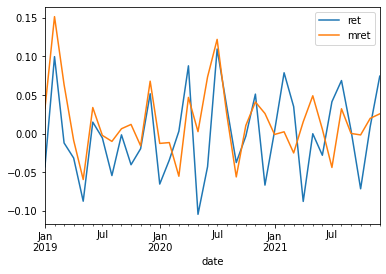

In [189]:
stk = df.loc[df.stkcd == "601390.SH"].set_index('date').copy()
#dataframe.set_index用已知的列作为index方便画图
# 300750.SZ 宁德时代
# 002594.SZ 比亚迪
# 002714.SZ 牧原股份
# 000001.SZ 平安银行
# 000002.SZ 万科
# 601390.SH 中国中铁
stk.dropna(inplace = True)
stk[['ret', 'mret']].plot()

<AxesSubplot:xlabel='date'>

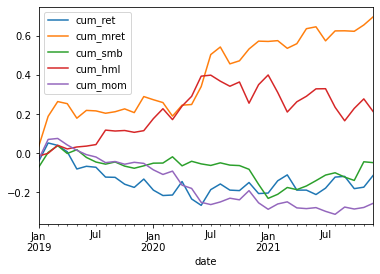

In [190]:
stk['cum_ret'] = (stk['ret'] + 1).cumprod() - 1
#cumprod()返回累乘
stk['cum_mret'] = (stk['mret'] + 1).cumprod() - 1
stk['cum_smb'] = (stk['smb'] + 1).cumprod() - 1
stk['cum_hml'] = (stk['hml'] + 1).cumprod() - 1
stk['cum_mom'] = (stk['mom'] + 1).cumprod() -1
stk[['cum_ret', 'cum_mret', 'cum_smb', 'cum_hml', 'cum_mom']].plot()

In [36]:
stk.tail(5)
#返回最后五行

,stkcd,prc,ym,ret,ret_l12_l2,mv_l1,pb_l1,retw,size_rank,pb_rank,sl,sn,sh,bl,bn,bh,cnt,mret,cum_ret,cum_mret
date,,,,,,,,,,,,,,,,,,,,
2021-08-31,000001.SZ,1992.21,202108,0.006217,-2.997711,3.432878e+07,1.1474,0.006217,0.995015,0.115508,False,False,False,True,False,False,4453,0.032294,0.661352,0.574541
2021-09-30,000001.SZ,2006.76,202109,0.007303,-1.027399,3.454224e+07,1.1243,0.007303,0.995732,0.093303,False,False,False,True,False,False,4492,0.000340,0.673485,0.575076
2021-10-31,000001.SZ,2182.48,202110,0.087564,26.353346,3.479452e+07,1.1325,0.087564,0.995324,0.089559,False,False,False,True,False,False,4523,-0.001535,0.820023,0.572659
2021-11-30,000001.SZ,1951.92,202111,-0.105641,14.350901,3.784122e+07,1.1866,-0.105641,0.995798,0.122848,False,False,False,True,False,False,4555,0.019872,0.627753,0.603911
2021-12-31,000001.SZ,1983.26,202112,0.016056,-1.231415,3.384364e+07,1.0612,0.016056,0.994951,0.087275,False,False,False,True,False,False,4577,0.025738,0.653888,0.645193


In [193]:
from sklearn.linear_model import LinearRegression

$$
r_i - r_f = \alpha + \beta (r_M - r_f) + \beta_2 SMB + \beta_3 HML + \beta_4 Momentum
$$

In [195]:
stk['ret'] -= rf
stk['mret'] -= rf

X1 = stk[['mret']].values
X2 = stk[['mret', 'smb', 'hml']].values
X3 = stk[['mret', 'smb', 'hml', 'mom']].values
y = stk['ret'].values
#.values把dataframe变成array
print('CAPM')
reg = LinearRegression().fit(X1, y)
reg.score(X1, y)

print('FF3')
reg = LinearRegression().fit(X2, y)
reg.score(X2, y)

print('FF3+MOM')
reg = LinearRegression().fit(X3, y)
reg.score(X3, y)

CAPM


0.24453629083655481

FF3


0.5983125360710847

FF3+MOM


0.6077564396204196

In [198]:
stk['ret'] #浮点
stk[['ret']] #Dataframe
stk[['ret']].values #Numpy array只有numpy array可以用sklearn

date
2019-01-31   -0.049380
2019-02-28    0.093071
2019-03-31   -0.018600
2019-04-30   -0.038068
2019-05-31   -0.093948
2019-06-30    0.008361
2019-07-31   -0.012050
2019-08-31   -0.060794
2019-09-30   -0.008097
2019-10-31   -0.046781
2019-11-30   -0.026070
2019-12-31    0.045084
2020-01-31   -0.071790
2020-02-29   -0.040722
2020-03-31   -0.003462
2020-04-30    0.081193
2020-05-31   -0.110925
2020-06-30   -0.049290
2020-07-31    0.102922
2020-08-31    0.028827
2020-09-30   -0.043924
2020-10-31   -0.009763
2020-11-30    0.044576
2020-12-31   -0.073136
2021-01-31   -0.003502
2021-02-28    0.072198
2021-03-31    0.028421
2021-04-30   -0.094237
2021-05-31   -0.006667
2021-06-30   -0.034530
2021-07-31    0.034735
2021-08-31    0.062141
2021-09-30   -0.002375
2021-10-31   -0.077892
2021-11-30    0.002536
2021-12-31    0.067801
Name: ret, dtype: float64

,ret
date,
2019-01-31,-0.049380
2019-02-28,0.093071
2019-03-31,-0.018600
2019-04-30,-0.038068
2019-05-31,-0.093948
2019-06-30,0.008361
2019-07-31,-0.012050
2019-08-31,-0.060794
2019-09-30,-0.008097


array([[-0.04938023],
       [ 0.09307087],
       [-0.01859984],
       [-0.03806763],
       [-0.09394846],
       [ 0.00836066],
       [-0.01205025],
       [-0.06079387],
       [-0.00809728],
       [-0.04678128],
       [-0.02606965],
       [ 0.04508371],
       [-0.07178968],
       [-0.04072239],
       [-0.00346154],
       [ 0.08119276],
       [-0.11092511],
       [-0.04928962],
       [ 0.10292237],
       [ 0.02882716],
       [-0.04392449],
       [-0.00976264],
       [ 0.04457557],
       [-0.07313639],
       [-0.00350211],
       [ 0.07219769],
       [ 0.02842105],
       [-0.09423729],
       [-0.00666667],
       [-0.03453044],
       [ 0.03473461],
       [ 0.06214067],
       [-0.00237482],
       [-0.07789174],
       [ 0.00253579],
       [ 0.06780142]])

In [ ]:
reg.score(X, y)

reg.coef_

reg.intercept_

0.20649796921277408

array([0.91955246])

0.004470334121018112

In [ ]:
np.corrcoef(stk[['ret', 'mret']].T)
#求correlationcoefficient .T代表Transpose dataframe竖变横

array([[1.        , 0.45442048],
       [0.45442048, 1.        ]])

In [41]:
stk['ret'].mean()

abs(reg.intercept_) / (stk['ret'].mean() - reg.intercept_)

0.01850477678310886

0.3185259456788542